<img src="./result/logo.png" alt="Drawing" align="left" style="width: 500px;"/>

In [1]:
# import necessary packages
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.metrics import auc, roc_curve, log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

%matplotlib inline

Using TensorFlow backend.


# Lending Club Loan Data Analysis and Modeling

Classification is one of two most common data science problems (another one is regression). For the supervised classification problem, imbalanced data is pretty common yet very challanging. For example, credit card fraud detection, disease classification, network intrusion and so on, are classification problem with imbalanced data. 

In this project, working with the Lending Club loan data, we hope to correctly predict whether or not on loan will be default using the history data.

# Contents
1. Problem Statement
2. Data Exploration
3. Data Cleaning and Initial Feature Engineering
    - Feature transformation
    - Missing values
    - Feature transformation
    - Feature normalization
    - And so on ......
4. Visualization
5. Further Feature Engineering
6. Machine Learning
    - Random Forest
7. Conclusions

# 1. Problem Statment

For companies like Lending Club, correctlly predicting whether or not one loan will be default is very important. In this project, using the historical data, more specifically, the Lending Club loan data from 2007 to 2015, we hope to build a machine learning model such that we can predict the chance of default for the future loans. As I will show later, this dataset is highly imbalanced and includes a lot of features, which makes this problem more challanging. 

# 2. Data Exploration

There are several ways to download the dataset, for example, you can go to Lending Club's [website](https://www.lendingclub.com/info/download-data.action), or you can go to [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data).

I will use the loan data from 2007 to 2015 as the training set (+ validation set), and use the data from 2016 as the test set.

| Attribute                  | Explanation                                                       |
| ------------------------   | ----------------------------------------------------------------- |
| id	                     | A unique LC assigned ID for the loan listing.                     |
| member_id	                 | A unique LC assigned Id for the borrower member.                  |
| loan_amnt	                 | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.          |
| funded_amnt	             | The total amount committed to that loan at that point in time.    |
| funded_amnt_inv	         | The total amount committed by investors for that loan at that point in time. |
| term	                     | The number of payments on the loan. Values are in months and can be either 36 or 60. |
| int_rate	                 | Interest Rate on the loan                                         |
| installment	             | The monthly payment owed by the borrower if the loan originates.  |
| grade	                     | LC assigned loan grade                                            |
| sub_grade	                 | LC assigned loan subgrade                                         |
| emp_title	                 | The job title supplied by the Borrower when applying for the loan.|
| emp_length	             | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                    |
| home_ownership	         | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER..                                                                     |
| annual_inc	             | The self-reported annual income provided by the borrower during registration. |
| verification_status	     | |
| issue_d	                 | The month which the loan was funded                               |
| loan_status	             | Current status of the loan                                        |
| pymnt_plan	             | Indicates if a payment plan has been put in place for the loan    |
| url	                     | URL for the LC page with listing data.                            |
| desc	                     | Loan description provided by the borrower                         |
| purpose	                 | A category provided by the borrower for the loan request.         |
| title	                     | The loan title provided by the borrower                           |
| zip_code	                 | The first 3 numbers of the zip code provided by the borrower in the loan application. |
| addr_state	             | The state provided by the borrower in the loan application        |
| dti	                     | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| delinq_2yrs	             | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years |
| earliest_cr_line	         | The month the borrower's earliest reported credit line was opened |
| inq_last_6mths	         | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) |
| mths_since_last_delinq	 | The number of months since the borrower's last delinquency.       |
| mths_since_last_record	 | The number of months since the last public record.                |
| open_acc	                 | The number of open credit lines in the borrower's credit file.    |
| pub_rec	                 | Number of derogatory public records                               |
| revol_bal	                 | Total credit revolving balance                                    |                 
| revol_util	             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                               |
| total_acc	                 | The total number of credit lines currently in the borrower's credit file |
| initial_list_status	     | The initial listing status of the loan. Possible values are – W, F|
| out_prncp	                 | Remaining outstanding principal for total amount funded           |
| out_prncp_inv	             | Remaining outstanding principal for portion of total amount funded by investors |
| total_pymnt	             | Payments received to date for total amount funded                 |
| total_pymnt_inv	         | Payments received to date for portion of total amount funded by investors |
| total_rec_prncp	         | Principal received to date                                        |
| total_rec_int	             | Interest received to date                                         |
| total_rec_late_fee	     | Late fees received to date                                        |
| recoveries	             | post charge off gross recovery                                    |
| collection_recovery_fee    | post charge off collection fee                                    |
| last_pymnt_d	             | Last month payment was received                                   |
| last_pymnt_amnt	         | Last total payment amount received                                |
| next_pymnt_d	             | Next scheduled payment date                                       |
| last_credit_pull_d	     | The most recent month LC pulled credit for this loan              |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections  |
| mths_since_last_major_derog| Months since most recent 90-day or worse rating                   |
| policy_code	             | "publicly available policy_code=1, new products not publicly available policy_code=2" |
| application_type	         | Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                     |
| annual_inc_joint	         | The combined self-reported annual income provided by the co-borrowers during registration                                                                                     |
| dti_joint	                 | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income                                                                                   |
| verified_status_joint	     | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified                                                                       |
| acc_now_delinq	         | The number of accounts on which the borrower is now delinquent.   |
| tot_coll_amt	             | Total collection amounts ever owed                                |
| tot_cur_bal	             | Total current balance of all accounts                             |
| open_acc_6m	             | Number of open trades in last 6 months                            |
| open_il_6m	             | Number of currently active installment trades                     |
| open_il_12m	             | Number of installment accounts opened in past 12 months           |
| open_il_24m	             | Number of installment accounts opened in past 24 months           |
| mths_since_rcnt_il	     | Months since most recent installment accounts opened              |
| total_bal_il	             | Total current balance of all installment accounts                 |
| il_util	                 | Ratio of total current balance to high credit/credit limit on all install acct |
| open_rv_12m	             | Number of revolving trades opened in past 12 months               |
| open_rv_24m	             | Number of revolving trades opened in past 24 months               |
| max_bal_bc	             | Maximum current balance owed on all revolving accounts            |
| all_util	                 | Balance to credit limit on all trades                             |
| total_rev_hi_lim  	     | Total revolving high credit/credit limit                          |
| inq_fi	                 | Number of personal finance inquiries                              |
| total_cu_tl	             | Number of finance trades                                          |
| inq_last_12m	             | Number of credit inquiries in past 12 months                      |

In [2]:
# Load the training and test data set
train = pd.read_csv('./data/2007-2015-loan.csv', low_memory=False, encoding='ISO-8859-1')
test = pd.read_csv('./data/2016-loan.csv', low_memory=False, encoding='ISO-8859-1')

# There are 74 features in total
print('Train:\t', train.shape)
print('Test:\t', test.shape)

Train:	 (887379, 74)
Test:	 (434407, 74)


In [3]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,35000,35000,35000.0,36 months,18.99%,1282.79,D,D4,...,63025.0,72.0,3.0,3.0,16542.0,71.0,34300,1.0,1.0,5.0
1,NaN,NaN,32000,32000,32000.0,36 months,5.32%,963.68,A,A1,...,35403.0,42.0,1.0,1.0,3442.0,33.0,35800,2.0,0.0,2.0
2,NaN,NaN,22000,22000,22000.0,36 months,6.49%,674.18,A,A2,...,39179.0,71.0,0.0,1.0,11746.0,67.0,90900,0.0,0.0,2.0
3,NaN,NaN,16300,16300,16300.0,36 months,9.75%,524.05,B,B3,...,14714.0,58.0,0.0,2.0,1969.0,65.0,20000,1.0,0.0,1.0
4,NaN,NaN,15000,15000,15000.0,36 months,11.47%,494.43,B,B5,...,71135.0,87.0,0.0,2.0,9883.0,60.0,63700,0.0,1.0,0.0


In [5]:
# Create a concise table for the data
train_dtype = train.dtypes.values
train_missing = train.isnull().sum().values
train_missing_ratio = train_missing / len(train)

test_dtype = test.dtypes.values
test_missing = test.isnull().sum().values
test_missing_ratio = test_missing / len(test)

# Calculate unique values
train_unique = []
test_unique = []
for name in train.columns:
    train_unique.append(train[name].unique().shape[0])
    test_unique.append(test[name].unique().shape[0])

# Useful information
tmp_map = {'Columns': train.columns, 'Train dtype': train_dtype, 'Train missing': train_missing, 
           'Train missing ratio': train_missing_ratio, 'Train unique': train_unique, 'Test dtype': test_dtype,
           'Test missing': test_missing, 'Test missing ratio': test_missing_ratio, 'Test unique': test_unique}
columns = ['Columns', 'Train dtype', 'Train missing', 'Train missing ratio', 'Train unique',
           'Test dtype', 'Test missing', 'Test missing ratio', 'Test unique']
df = pd.DataFrame(tmp_map, columns=columns)

pd.options.display.max_rows = 75
df

,Columns,Train dtype,Train missing,Train missing ratio,Train unique,Test dtype,Test missing,Test missing ratio,Test unique
0,id,int64,0,0.000000,887379,float64,434407,1.000000,1
1,member_id,int64,0,0.000000,887379,float64,434407,1.000000,1
2,loan_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
3,funded_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
4,funded_amnt_inv,float64,0,0.000000,9856,float64,0,0.000000,1549
5,term,object,0,0.000000,2,object,0,0.000000,2
6,int_rate,float64,0,0.000000,542,object,0,0.000000,140
7,installment,float64,0,0.000000,68711,float64,0,0.000000,42851
8,grade,object,0,0.000000,7,object,0,0.000000,7
9,sub_grade,object,0,0.000000,35,object,0,0.000000,35


We should notice some differences between the training and test set, and look into details. Some major difference are:
1. For test set, `id`, `member_id`, and `url` are totally missing, which is different from training set
2. For training set, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`, `total_cu_tl`, and `inq_last_12m` are almost missing in training set, which is different from test set
3. `desc`, `mths_since_last_delinq`, `mths_since_last_record`, `mths_since_last_major_derog`, `annual_inc_joint`, `dti_joint`, and `verification_status_joint` have large amount of missing values
4. There are multiple `loan status`, but we only concern whether or not the load is default

# 3. Data Cleaning and Initial Feature Engineering

### I. Transform feature `int_rate` and `revol_util` in test set

In [6]:
# Check the difference values for int_rate, revol_util
print('Item\t', 'int_rate', '\t', 'revol_util')
print('-' * 40)
print('Train:\t', train['int_rate'][0], '\t\t', train['revol_util'][0])
print('Test:\t', test['int_rate'][0], '\t', test['revol_util'][0])

Item	 int_rate 	 revol_util
----------------------------------------
Train:	 10.65 		 83.7
Test:	 18.99% 	 70.50%


In [7]:
# Using lambda function
test['int_rate'] = test['int_rate'].apply(lambda x: float(x[:-1]))

index = test[~test['revol_util'].isnull()].index
test.loc[index, 'revol_util'] = test.loc[index, 'revol_util'].apply(lambda x: float(x[:-1]))
test['revol_util'] = test['revol_util'].astype(float)

### II. Transform target values `loan_status`

In [8]:
# Check the target values
print('Train:\n', list(train['loan_status'].unique()))
print('\nTest:\n', list(test['loan_status'].unique()))

Train:
 ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued']

Test:
 ['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default']


In [9]:
# Let's only keep the data that is not in process currentlly, for more details, refer to 
# https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-
drop_status = ['Issued']
train = train[~train['loan_status'].isin(drop_status)]
test = test[~test['loan_status'].isin(drop_status)]

In [10]:
# Treat this as a binary classification problem
maps = {'Current': 0, 'Fully Paid': 0, 'Charged Off': 1, 'Default': 1, 
        'Does not meet the credit policy. Status:Fully Paid': 0, 
        'Does not meet the credit policy. Status:Charged Off': 1, 
        'In Grace Period': 0, 'Late (16-30 days)': 1, 'Late (31-120 days)': 1}
train['loan_status'] = train['loan_status'].apply(lambda x: maps[x])
test['loan_status'] = test['loan_status'].apply(lambda x: maps[x])

In [11]:
# Check the imbalance
train_default_ratio = np.round(len(train[train['loan_status'] == 1]) / len(train), 4)
train_nondefault_ratio = np.round(len(train[train['loan_status'] == 0]) / len(train), 4)
test_default_ratio = np.round(len(test[test['loan_status'] == 1]) / len(test), 4)
test_nondefault_ratio = np.round(len(test[test['loan_status'] == 0]) / len(test), 4)
print('Item\t', 'Default', '\t', 'Not Default')
print('-' * 40)
print('Train:\t', train_default_ratio, '\t', train_nondefault_ratio)
print('Test:\t', test_default_ratio, '\t', test_nondefault_ratio)

Item	 Default 	 Not Default
----------------------------------------
Train:	 0.0696 	 0.9304
Test:	 0.0363 	 0.9637


It's clear that our dataset is highly imbalanced.

In [12]:
# Create a concise table for the data
train_dtype = train.dtypes.values
train_missing = train.isnull().sum().values
train_missing_ratio = train_missing / len(train)

test_dtype = test.dtypes.values
test_missing = test.isnull().sum().values
test_missing_ratio = test_missing / len(test)

# Calculate unique values
train_unique = []
test_unique = []
for name in train.columns:
    train_unique.append(train[name].unique().shape[0])
    test_unique.append(test[name].unique().shape[0])

# Useful information
df = pd.DataFrame({'Columns': train.columns, 'Train dtype': train_dtype, 'Train missing': train_missing, 
                   'Train missing ratio': train_missing_ratio, 'Train unique': train_unique, 
                   'Test dtype': test_dtype, 'Test missing': test_missing, 
                   'Test missing ratio': test_missing_ratio, 'Test unique': test_unique}, 
                  columns=['Columns', 'Train dtype', 'Train missing', 'Train missing ratio', 'Train unique',
                           'Test dtype', 'Test missing', 'Test missing ratio', 'Test unique'])

df

,Columns,Train dtype,Train missing,Train missing ratio,Train unique,Test dtype,Test missing,Test missing ratio,Test unique
0,id,int64,0,0.000000,878919,float64,434407,1.000000,1
1,member_id,int64,0,0.000000,878919,float64,434407,1.000000,1
2,loan_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
3,funded_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
4,funded_amnt_inv,float64,0,0.000000,9856,float64,0,0.000000,1549
5,term,object,0,0.000000,2,object,0,0.000000,2
6,int_rate,float64,0,0.000000,541,float64,0,0.000000,140
7,installment,float64,0,0.000000,68291,float64,0,0.000000,42851
8,grade,object,0,0.000000,7,object,0,0.000000,7
9,sub_grade,object,0,0.000000,35,object,0,0.000000,35


### III. Drop useless features

In [13]:
# Drop the features that has too many missing values
useless = ['id', 'member_id', 'url', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 
           'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
           'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'desc', 
           'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 
           'annual_inc_joint', 'dti_joint', 'verification_status_joint']
train = train.drop(labels=useless, axis=1)
test = test.drop(labels=useless, axis=1)

In [14]:
# Drop meaningless features based on understanding
meaningless = ['emp_title', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'zip_code', 'title', 
               'grade', 'earliest_cr_line', 'last_credit_pull_d', 'policy_code']
train = train.drop(labels=meaningless, axis=1)
test = test.drop(labels=meaningless, axis=1)

In [15]:
_ = gc.collect()
print(train.shape, test.shape)

(878919, 40) (434407, 40)


Now, we have successfully reduce the features from 74 to 40. Next, let's focus on more detailed feature engineering

First, let's look at the data again. From the below table, we can see that:
* Most features are numerical, but there are severl categorical features.
* There are still some missing values among numerical and categorical features.

In [16]:
# Create a concise table for the data
train_dtype = train.dtypes.values
train_missing = train.isnull().sum().values
train_missing_ratio = train_missing / len(train)

test_dtype = test.dtypes.values
test_missing = test.isnull().sum().values
test_missing_ratio = test_missing / len(test)

# Calculate unique values
train_unique = []
test_unique = []
for name in train.columns:
    train_unique.append(train[name].unique().shape[0])
    test_unique.append(test[name].unique().shape[0])

# Useful information
df = pd.DataFrame({'Columns': train.columns, 'Train dtype': train_dtype, 'Train missing': train_missing, 
                   'Train missing ratio': train_missing_ratio, 'Train unique': train_unique, 
                   'Test dtype': test_dtype, 'Test missing': test_missing, 
                   'Test missing ratio': test_missing_ratio, 'Test unique': test_unique}, 
                  columns=['Columns', 'Train dtype', 'Train missing', 'Train missing ratio', 'Train unique',
                           'Test dtype', 'Test missing', 'Test missing ratio', 'Test unique'])

df

,Columns,Train dtype,Train missing,Train missing ratio,Train unique,Test dtype,Test missing,Test missing ratio,Test unique
0,loan_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
1,funded_amnt,float64,0,0.000000,1372,int64,0,0.000000,1533
2,funded_amnt_inv,float64,0,0.000000,9856,float64,0,0.000000,1549
3,term,object,0,0.000000,2,object,0,0.000000,2
4,int_rate,float64,0,0.000000,541,float64,0,0.000000,140
5,installment,float64,0,0.000000,68291,float64,0,0.000000,42851
6,sub_grade,object,0,0.000000,35,object,0,0.000000,35
7,emp_length,object,44194,0.050282,12,object,28214,0.064948,12
8,home_ownership,object,0,0.000000,6,object,0,0.000000,4
9,annual_inc,float64,4,0.000005,49121,float64,0,0.000000,27841


### IV. Feature transformation

Transform numerical values into categorical values

In [17]:
transform_featurs = ['total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'tot_coll_amt', 
                     'collections_12_mths_ex_med', 'acc_now_delinq', 'out_prncp', 'out_prncp_inv']
for name in transform_featurs:
    train[name] = (train[name] > 0).astype(str)
    test[name] = (test[name] > 0).astype(str)

Transform categorical values into numerical values (discrete)

In [18]:
# Transform sub_grade
sub_grade_encoder = LabelEncoder()
sub_grade_encoder.fit(train['sub_grade'])
train['sub_grade'] = sub_grade_encoder.transform(train['sub_grade'])
test['sub_grade'] = sub_grade_encoder.transform(test['sub_grade'])

In [19]:
# Transform emp_length (first fill NA value with mode)
mode = train['emp_length'].mode().values[0]
train['emp_length'] = train['emp_length'].fillna(value=mode)
test['emp_length'] = test['emp_length'].fillna(value=mode)

# Manually do encoding due to sort problems
emp_map = {'< 1 year': 0, '1 year': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, 
           '2 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
train['emp_length'] = train['emp_length'].apply(lambda x: emp_map[x])
test['emp_length'] = test['emp_length'].apply(lambda x: emp_map[x])

### V. Fill missing values
* For numerical features, use `median`
* For categorical features, use `mode` (here, we don't have missing categorical values)

In [20]:
# Seperate numerical and categorical features (16 categorical features, 23 numerical features)
numerical_feature = train.select_dtypes(exclude=['object']).columns.drop('loan_status')
categorical_feature = train.select_dtypes(include=['object']).columns

print('Numerical:\t', len(numerical_feature))
print('Categorical:\t', len(categorical_feature))

Numerical:	 23
Categorical:	 16


In [21]:
# Fill numerical features with median
medians = train[numerical_feature].median(axis=0, skipna=True)
train[numerical_feature] = train[numerical_feature].fillna(value=medians)
test[numerical_feature] = test[numerical_feature].fillna(value=medians)

# 4. Visualization 

### I. Visualize categorical features

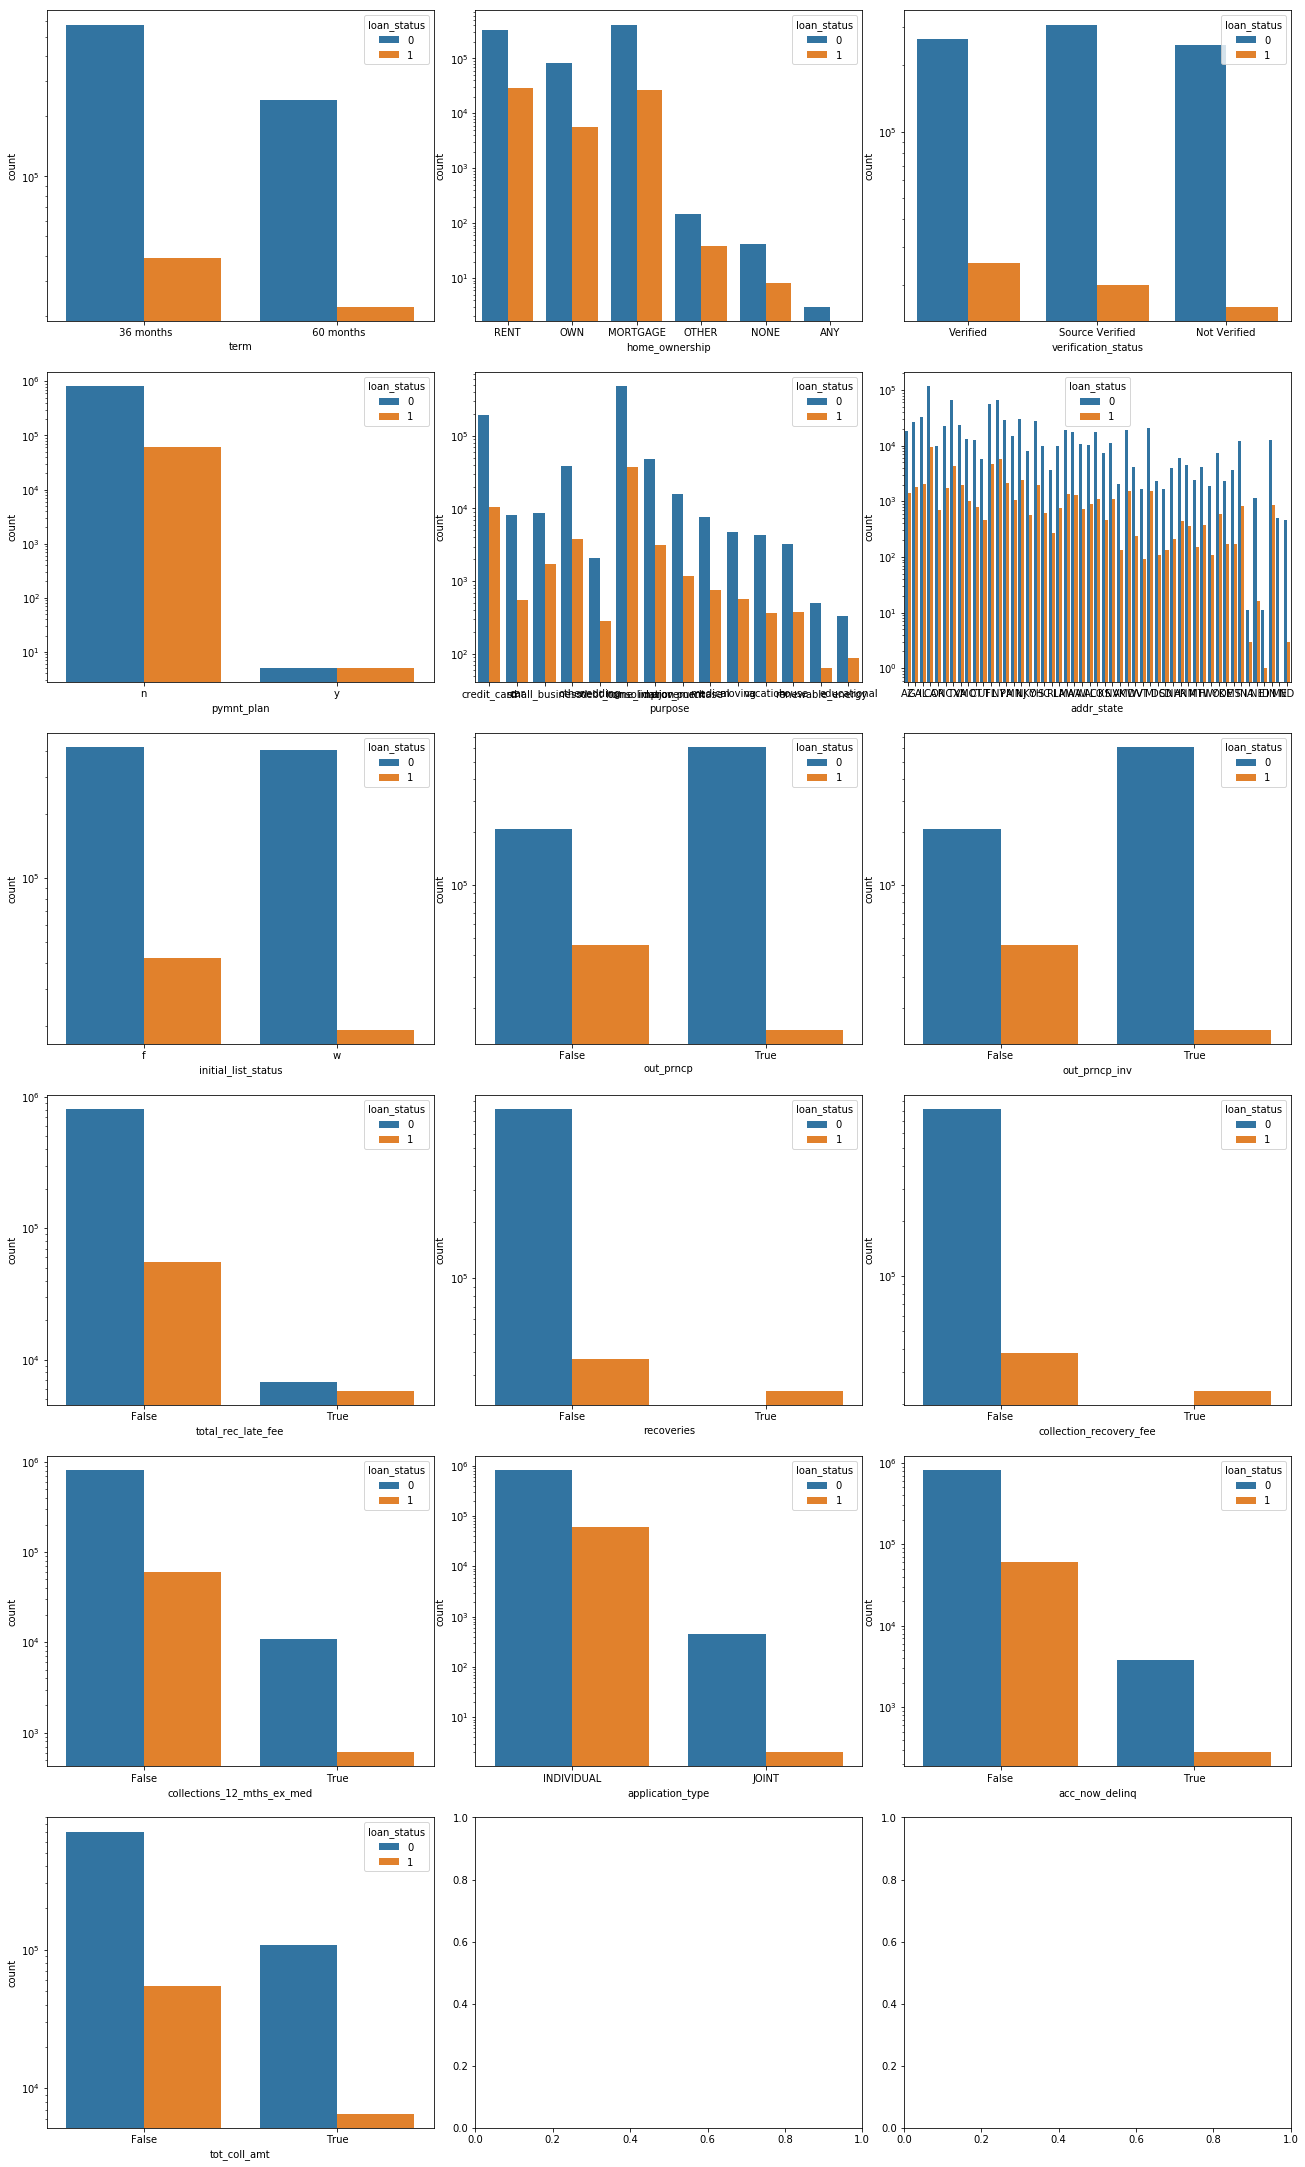

In [22]:
# For better visualization purpose, we set the y to be log scale
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
plt.tight_layout(h_pad=3)
for i in range(len(categorical_feature)):
    name = categorical_feature[i]
    sns.countplot(x=name, hue='loan_status', data=train, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_yscale('log')
plt.show()
_ = gc.collect()

### II. Visualize numerical features

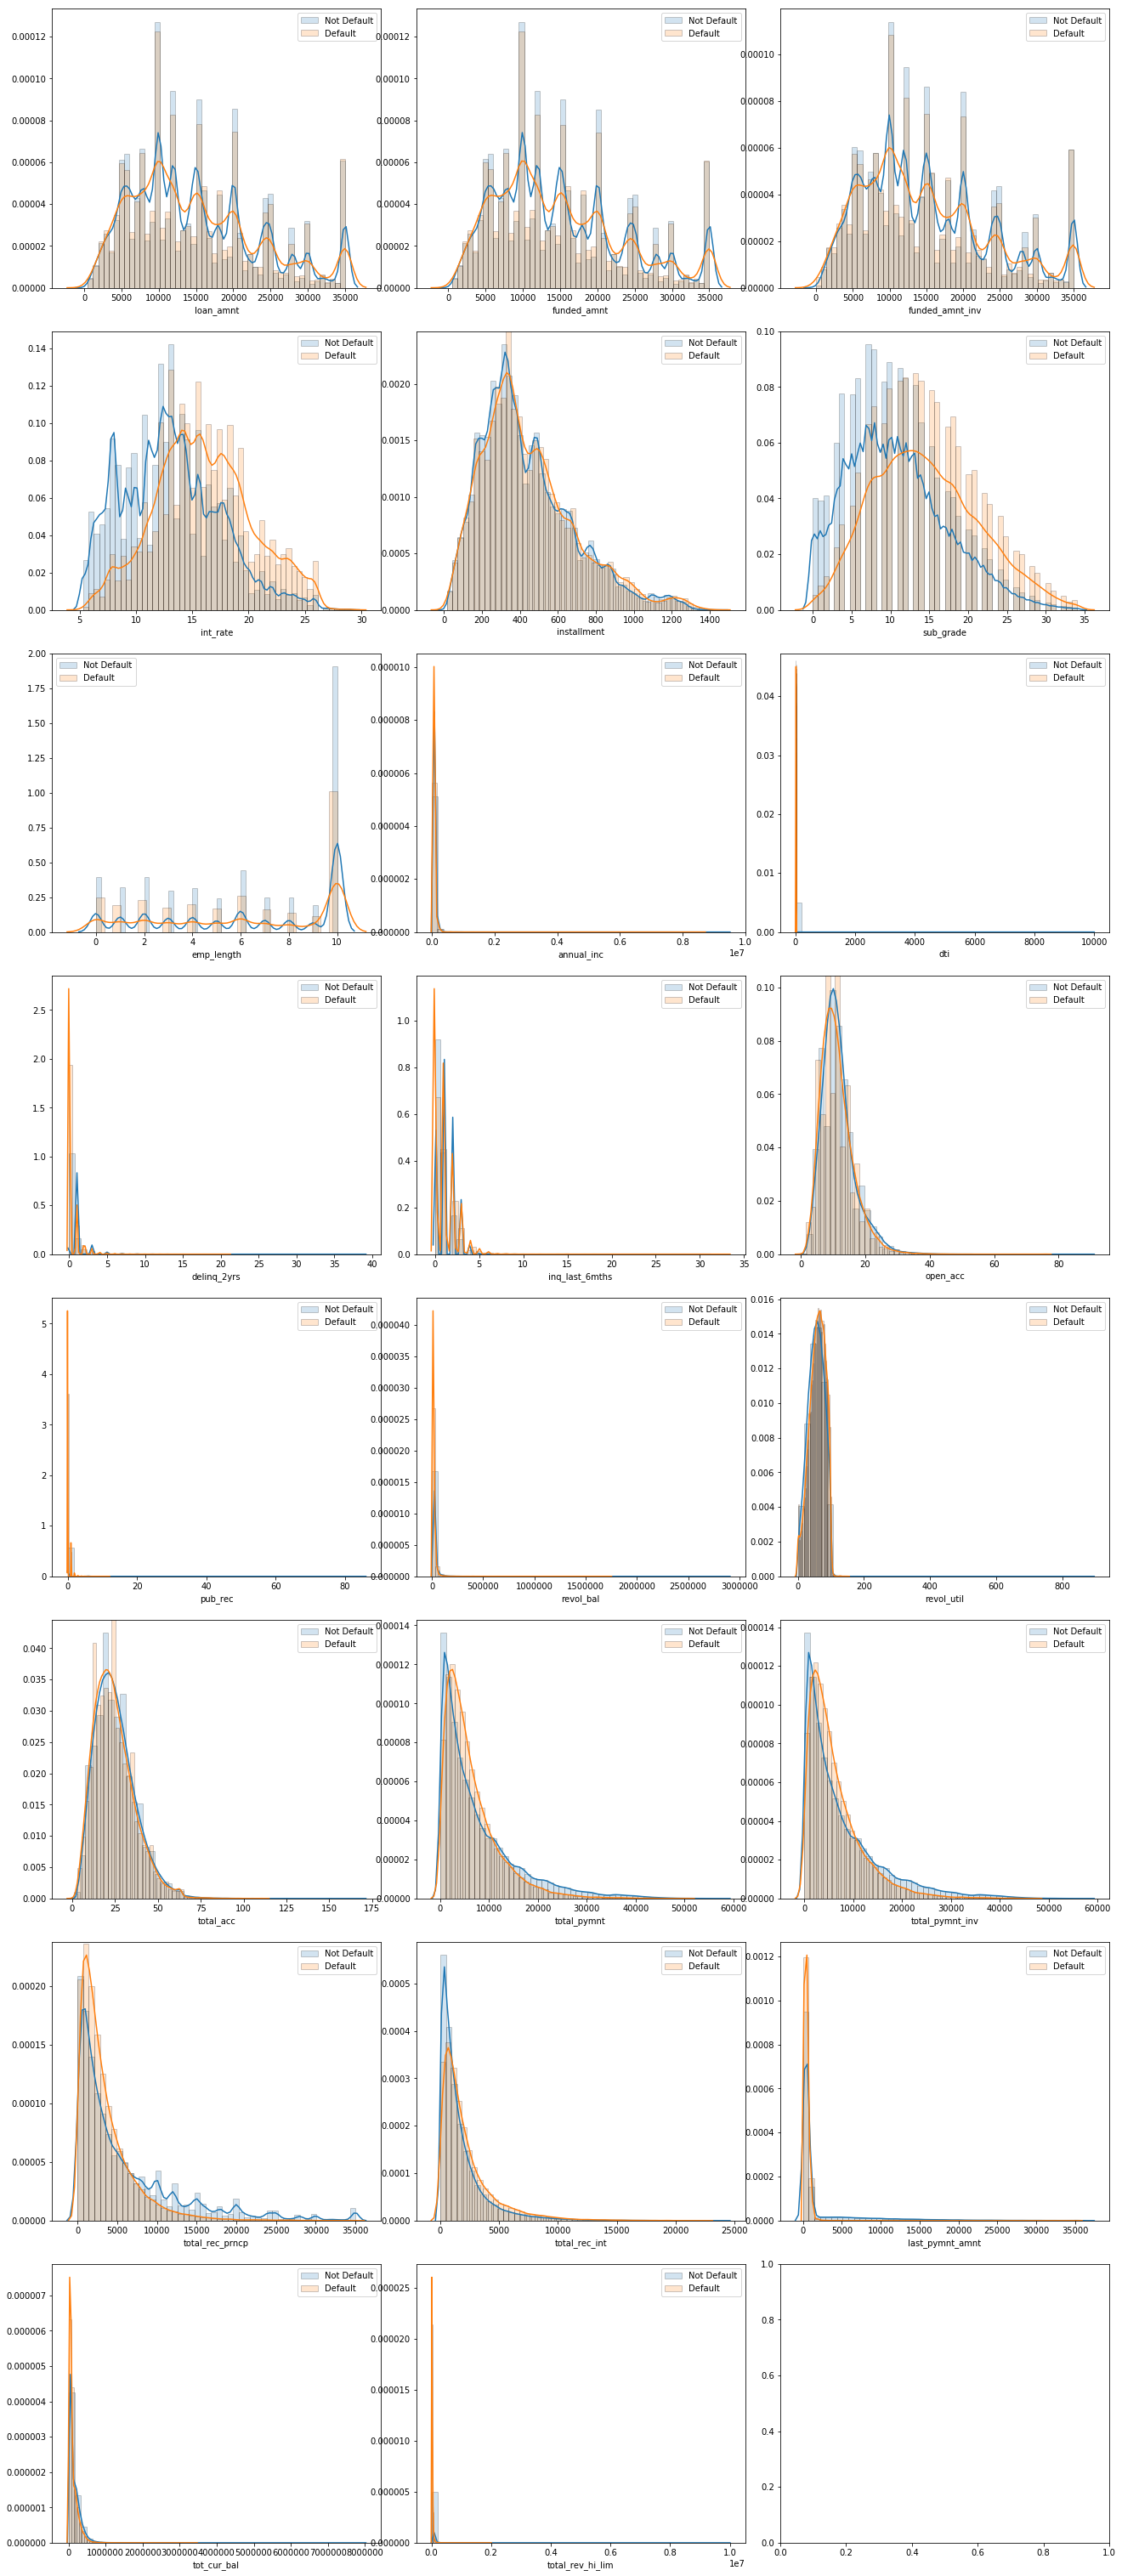

In [23]:
# Histogram of numerical values
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(18, 42))
plt.tight_layout(h_pad=3)
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
for i in range(len(numerical_feature)):
    name = numerical_feature[i]
    sns.distplot(train[train['loan_status'] == 0][name], label='Not Default',
                 hist_kws=hist_kws, ax=ax[i//3][i%3])
    sns.distplot(train[train['loan_status'] == 1][name], label='Default',
                 hist_kws=hist_kws, ax=ax[i//3][i%3])
    ax[i//3][i%3].legend()
plt.show()
_ = gc.collect()

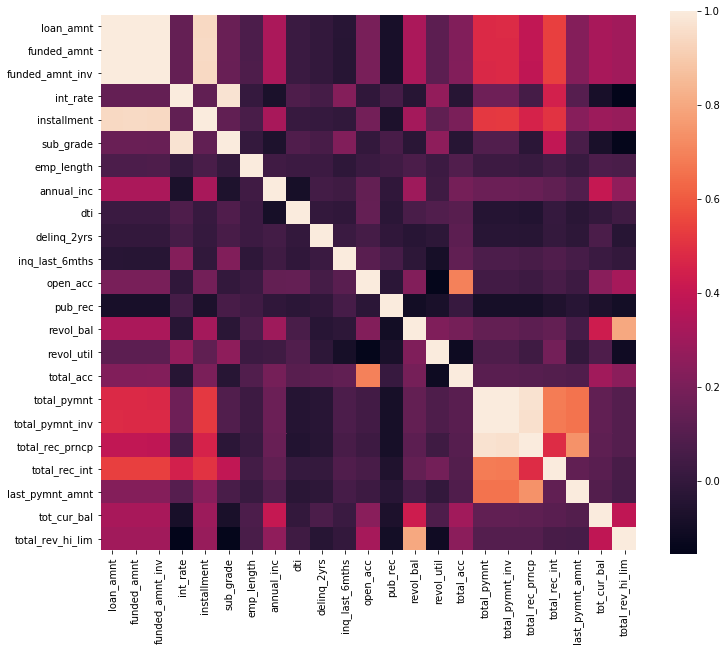

In [24]:
# Heatmap of the correlation
corr = train[numerical_feature].corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax)
plt.axis('image')
plt.show()

# 5. Further Feature Engineering

From the above heatmap and the categorical variable countplot, we can see that some feature has strong correlation
* `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`
* `int_rate`, `sub_grade`
* `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`
* `out_prncp`, `out_prncp_inv`
* `recoveries`, `collection_recovery_fee`

We can drop some of them to reduce redundancy

In [25]:
# Drop redundant features
useless = ['funded_amnt', 'funded_amnt_inv', 'installment', 'sub_grade', 'total_pymnt_inv', 
           'total_rec_prncp', 'out_prncp_inv', 'collection_recovery_fee']
train = train.drop(useless, axis=1)
test = test.drop(useless, axis=1)

In [26]:
# Seperate numerical and categorical features (14 categorical features, 17 numerical features)
numerical_feature = train.select_dtypes(exclude=['object']).columns.drop('loan_status')
categorical_feature = train.select_dtypes(include=['object']).columns

print('Numerical:\t', len(numerical_feature))
print('Categorical:\t', len(categorical_feature))

Numerical:	 17
Categorical:	 14


Now, we only 14 categorical features, 17 numerical features. Let's check the correlation again.

In [27]:
print('Numerical features:', '\n', list(numerical_feature), '\n')
print('Categorical Features:', '\n', list(categorical_feature))

Numerical features: 
 ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim'] 

Categorical Features: 
 ['term', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt']


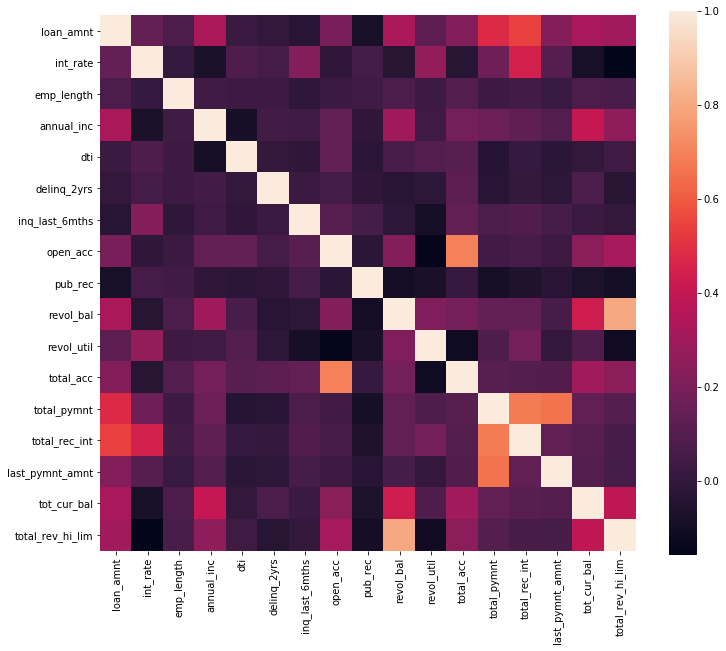

In [28]:
# Check the heatmap again
corr = train[numerical_feature].corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax)
plt.axis('image')
plt.show()

# 6. Machine Learning

After the above procedures, we are ready to build the predictive models. In this part, I explored the application of Random Forest.

I used to use scikit-learn a lot. But there is one problem with scikit-learn: you need to do one-hot encoding manually, which can sometimes dramatically increase the feature space. In this part, for logistic regression and random forest, I use H2O package, which has a better support with categorical features. For deep learning model, I use Keras with TensorFlow backend. 

For imbalanced data, generally used methods include `Oversampling`, `Undersampling`, `SMOTE` (Synthetic Minority Oversampling Technique). For a lot of ensemble algorithms, for example, random forest, you only need to set the `balance_class` to be `True`

In [29]:
# Define x and y variables
train = shuffle(train, random_state=42)
x = list(train.columns.drop('loan_status'))
y = 'loan_status'

train_y = train['loan_status'].values
test_y = test['loan_status'].values

In [30]:
# Initialize H2O cluster
h2o.init(nthreads=-1, max_mem_size=32)
h2o.remove_all()

# Transform to H2O Frame, and make sure the target variable is categorical
h2o_train = H2OFrame(train)
h2o_test = H2OFrame(test)

h2o_train['loan_status'] = h2o_train['loan_status'].asfactor()
h2o_test['loan_status'] = h2o_test['loan_status'].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxf1pii50
  JVM stdout: /tmp/tmpxf1pii50/h2o_ubuntu_started_from_python.out
  JVM stderr: /tmp/tmpxf1pii50/h2o_ubuntu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_ubuntu_asx7tm
H2O cluster total nodes:,1
H2O cluster free memory:,28.44 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


###  Random Forest

In [31]:
# # Train random forest model using grid search
# hyper_parameters = {'max_depth': [15, 20], 
#                     'min_rows': [3, 5, 7]}

# # Build random forest model
# rf = H2ORandomForestEstimator(balance_classes=True, ntrees=200, stopping_rounds=5, nfolds=5, 
#                               stopping_metric='auc', keep_cross_validation_predictions=True)

# # Grid search
# rf_grid = H2OGridSearch(rf, hyper_parameters, grid_id='DRF')
# rf_grid.train(x=x, y=y, training_frame=h2o_train)

In [32]:
# # Get the grid search result, sorted by AUC
# rf_models = rf_grid.get_grid(sort_by='auc', decreasing=True)

# # Choose the best model
# best_rf = rf_grid.models[0]

# rf_models

In [36]:
# Build Random Forest model
rf_model = H2ORandomForestEstimator(balance_classes=True, ntrees=200, max_depth=20, min_rows=3, seed=42)
rf_model.train(x=x, y=y, training_frame=h2o_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [38]:
# Make prediction
rf_train_pred = rf_model.predict(h2o_train).as_data_frame()['p1'].values
rf_test_pred = rf_model.predict(h2o_test).as_data_frame()['p1'].values

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


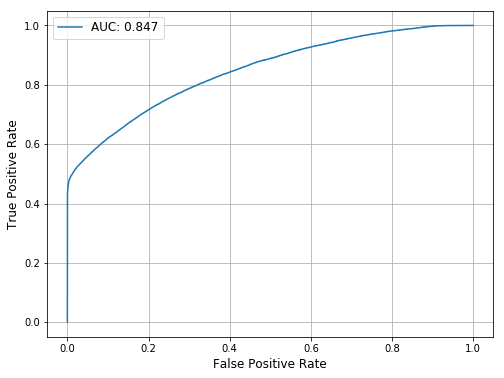

In [40]:
# Build the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_test_pred)
rf_auc = np.round(auc(rf_fpr, rf_tpr), 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(rf_fpr, rf_tpr, label='AUC: ' + str(rf_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

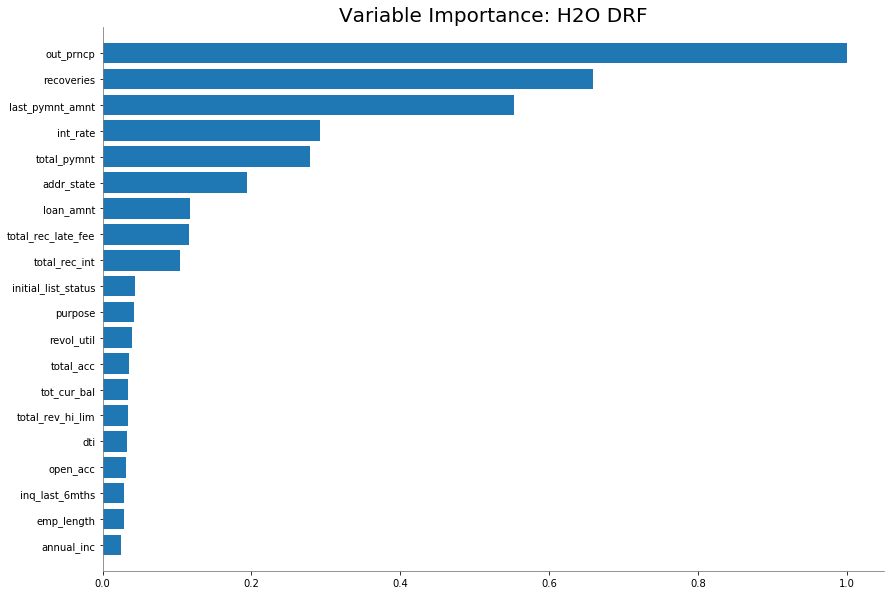

In [43]:
# Feature importance
rf_model.varimp_plot(num_of_features=20)
plt.show()

| Attribute                  | Explanation                                                       |
| ------------------------   | ----------------------------------------------------------------- |
| out_prncp	                 | Remaining outstanding principal for total amount funded           |
| recoveries	             | post charge off gross recovery                                    |
| last_pymnt_amnt	         | Last total payment amount received                                |
| int_rate	                 | Interest Rate on the loan                                         |
| total_pymnt	             | Payments received to date for total amount funded                 |
| addr_state	             | The state provided by the borrower in the loan application        |
| loan_amnt	                 | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.          |
| total_rec_late_fee	     | Late fees received to date                                        |
| total_rec_int	             | Interest received to date                                         |

In [44]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_b98d closed.


I have also explored logistic regression and deep learning models for the same problem, please refer to https://github.com/JifuZhao/Lending_Club_Loan/blob/master/Lending%20Club%20Modeling%20(AWS).ipynb for details

# 7. Conclusions

I have explored three algorithms: Logistic Regression, Random Forest, and Neural Networks. Their performance on the test set is pretty similar. Based on our simple analysis and grid search, Random Forest gives the best result. 

There are a lot of other methods, such as AdaBoost and XGBoost, and we can tune a lot of parameters for different models, especially for Neural Networks. Here, I didn't explore all possible algorithms and conduct comprehensive parameter tuning.